<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Miscellaneous/Longer_Term_Crypto_Degrees_of_Freedom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from my_library import *

In [106]:
data=pd.read_table('https://s3.amazonaws.com/public.gillerinvestments.com/crypto_returns.txt',header=[0, 1],skiprows=[2],sep='\\s+',engine='python',parse_dates=True)
data.columns=data.columns.droplevel(1)
data.index=pd.DatetimeIndex(data.index).to_period('D')
data.index.name='UTC Date'
data.columns.name='Return (%)'
data=data[sorted(data.columns)].copy()
data.drop(data.index[-1],inplace=True) # remove the final row in case it is not complete
display(data)

Return (%),AAVE-USD,AVAX-USD,BCH-USD,BTC-USD,COMP-USD,DOGE-USD,ETC-USD,ETH-USD,LINK-USD,LTC-USD,SHIB-USD,UNI-USD,XLM-USD,XTZ-USD
UTC Date,,,,,,,,,,,,,,
2024-07-31,2.001567,-2.358840,-4.200110,-2.365537,-0.047707,-2.837462,-2.073961,-1.452662,-2.375695,-2.164731,-6.382353,-3.024153,-1.936113,-2.775783
2024-08-01,8.726297,0.036957,-0.288448,1.151609,1.518046,-2.302137,-0.996922,-0.871557,0.491381,-0.799247,-0.816839,0.230222,-1.248259,-0.608589
2024-08-02,-5.610969,-8.265604,-7.564218,-6.025579,-4.053610,-6.341034,-6.167053,-6.727354,-7.544241,-6.546150,-7.190371,-8.025336,-3.852546,-5.256278
2024-08-03,-4.481945,-3.931834,-4.592054,-1.198185,-13.779336,-3.094934,-2.771871,-2.837828,-1.918234,-0.578258,-2.866894,0.234600,-2.236539,-0.486530
2024-08-04,-7.831497,-6.321154,-8.886479,-4.229510,-7.939911,-4.046256,-3.804583,-7.507444,-6.932854,-3.440406,-6.289529,-7.255568,-5.467211,-3.531816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-28,-4.781348,-2.573651,-1.339285,-0.324363,-1.364041,0.029440,-3.285871,-2.117051,-4.060127,-1.846207,-1.066718,-5.660094,3.067330,0.517770
2024-11-29,-0.645754,4.874354,1.316604,1.917306,-2.792655,6.001552,0.181966,0.368165,1.784959,9.634147,2.078024,-1.526314,9.049552,6.860281
2024-11-30,6.433075,-0.099144,1.587602,-1.082254,1.747587,-1.025727,2.287106,3.117929,4.067186,-2.019591,2.707893,1.696948,-3.938460,23.014582


Return (%),AAVE-USD,AVAX-USD,BCH-USD,BTC-USD,COMP-USD,DOGE-USD,ETC-USD,ETH-USD,LINK-USD,LTC-USD,SHIB-USD,UNI-USD,XLM-USD,XTZ-USD
Return (%),,,,,,,,,,,,,,
AAVE-USD,1.000000,0.580733,0.561635,0.486128,0.658954,0.309794,0.629022,0.657227,0.577170,0.384367,0.375095,0.720022,0.122963,0.345373
AVAX-USD,0.580733,1.000000,0.656469,0.679268,0.812265,0.567217,0.680669,0.670317,0.793021,0.539004,0.586668,0.591312,0.273690,0.451242
BCH-USD,0.561635,0.656469,1.000000,0.793179,0.596818,0.653806,0.792291,0.803037,0.620232,0.589490,0.669382,0.654954,0.342217,0.517395
BTC-USD,0.486128,0.679268,0.793179,1.000000,0.543428,0.763416,0.660368,0.798996,0.577070,0.527103,0.661571,0.606184,0.190811,0.415752
COMP-USD,0.658954,0.812265,0.596818,0.543428,1.000000,0.434580,0.701031,0.626659,0.779121,0.488813,0.469024,0.617524,0.345686,0.524333
DOGE-USD,0.309794,0.567217,0.653806,0.763416,0.434580,1.000000,0.520273,0.582094,0.415863,0.398555,0.765341,0.444399,0.251329,0.327304
ETC-USD,0.629022,0.680669,0.792291,0.660368,0.701031,0.520273,1.000000,0.809652,0.662299,0.641798,0.611830,0.740217,0.502327,0.539920
ETH-USD,0.657227,0.670317,0.803037,0.798996,0.626659,0.582094,0.809652,1.000000,0.641681,0.545690,0.584179,0.721735,0.223722,0.474268
LINK-USD,0.577170,0.793021,0.620232,0.577070,0.779121,0.415863,0.662299,0.641681,1.000000,0.597665,0.430521,0.663545,0.282733,0.513237


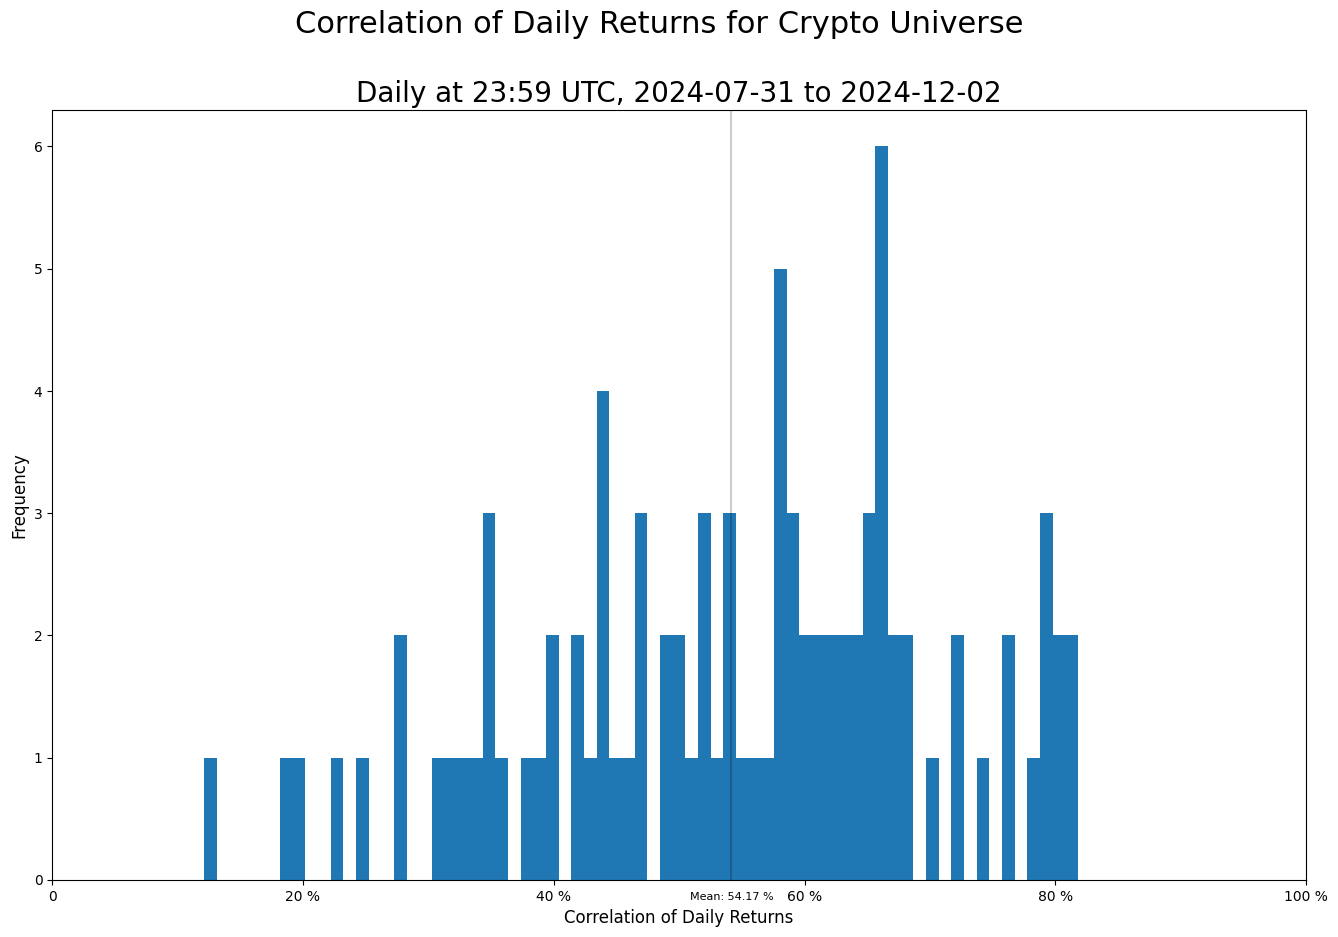

In [107]:
display(rho:=data.corr())
samples=pd.DataFrame({"row":[],"column":[],"correlation":[]}).set_index(["row","column"])

for i in range(rho.shape[0]):
    for j in range(i+1,rho.shape[0]):
        samples.loc[(rho.index[i],rho.columns[j]),"correlation"]=rho.iloc[i,j]*hundred

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
counts,bins,patches=plot.hist(samples['correlation'],bins=np.linspace(zero,hundred,100))
plot.set_xlabel("Correlation of Daily Returns",fontsize=12)
plot.xaxis.set_major_formatter(PercentLabels(0))
plot.set_ylabel("Frequency",fontsize=12)
plot.yaxis.set_major_formatter(CountLabels(0))
plot.set_title(subtitle:="Daily at 23:59 UTC, %s to %s" % (data.index[0],data.index[-1]),fontsize=20)
plot.set_xlim(zero,hundred)
plot.axvline(m:=samples['correlation'].mean(),color='black',alpha=0.2)
plot.text(m,zero,"\nMean: {:.2f} %".format(m),ha='center',va='top',fontsize=8)
figure.suptitle(title:="Correlation of Daily Returns for Crypto Universe",fontsize=22)
figure.savefig((filepath:='/content/drive/MyDrive/')+title+(filetype:='.pdf'),dpi=300,bbox_inches='tight')

In [108]:
if 'random_seed' not in locals():
    random_seed=12345678 # don't reset the seed multiple times in one session

if random_seed is not None:
    generator=np.random.default_rng(seed=random_seed)
    nprint("Using NumPy random seed %d." % random_seed)
    random_seed=None

else:
    nprint("Continuing random sequence from prior seed.")

17:34:18 Continuing random sequence from prior seed.


In [118]:
results=pd.DataFrame({"Sample":range(1,(n:=1000)+1),"Assets":[np.nan]*n,"Portfolio":[np.nan]*n,"Coins":[""]*n}).set_index("Sample") # n is number of trials
nprint("Beginning analysis for {:,d} trials.".format(n))

for i in tqdm(results.index): # for each trial, pick a random sample of stocks with portfolio sizes uniformly distributed between 1 and maximum, one of 2^503-1 choices
    returns=pd.DataFrame()

    for ticker in data[generator.choice(data.columns,generator.integers(1,data.shape[1]+1),replace=False)]:
        returns[ticker]=data[ticker]
        returns=returns.copy() # 'cos it frags, apparently

    results.loc[i,"Coins"]=",".join(sorted(map(lambda x:x.split('-')[0],returns.columns))) # list of coins in portfolio
    returns['Portfolio']=returns.mean(axis=1) # equal weighted portfolio return
    select=returns["Portfolio"]>zero if filter=="Up" else returns["Portfolio"]<zero if filter=="Down" else ~returns["Portfolio"].isna()
    results.loc[i,"Assets"]=returns.shape[1]-1 # number of assets we ended up with
    results.loc[i,"Independent"]=returns.loc[select,[a for a in returns if a!="Portfolio"]].var().sum()/results.loc[i,"Assets"]**2 # if no correlation, portfolio variance is total variance divided by square of number of assets
    results.loc[i,"Portfolio"]=returns.loc[select,'Portfolio'].var() # variance of portfolio returns for same period as individual returns

results.dropna(inplace=True)
results.drop_duplicates(inplace=True)
results["Effective D.o.F."]=results["Independent"]/results["Portfolio"]*results["Assets"]
display(results)
nprint("Done.")

19:45:05 Beginning analysis for 1,000 trials.


  0%|          | 0/1000 [00:00<?, ?it/s]

,Assets,Portfolio,Coins,Independent,Effective D.o.F.
Sample,,,,,
1,14.0,13.296138,"AAVE,AVAX,BCH,BTC,COMP,DOGE,ETC,ETH,LINK,LTC,S...",1.861644,1.960194
2,2.0,21.269854,"BCH,XTZ",14.511089,1.364475
3,10.0,13.569323,"AAVE,AVAX,BTC,COMP,DOGE,ETC,ETH,SHIB,UNI,XLM",2.634448,1.941474
4,9.0,13.320809,"AAVE,AVAX,BTC,DOGE,ETC,ETH,LINK,LTC,UNI",2.425522,1.638767
5,9.0,15.099312,"AAVE,AVAX,BCH,BTC,COMP,DOGE,LINK,UNI,XTZ",2.873037,1.712484
...,...,...,...,...,...
996,8.0,13.305393,"AAVE,BTC,DOGE,ETC,ETH,SHIB,XLM,XTZ",3.580632,2.152890
997,12.0,12.885238,"AAVE,AVAX,BCH,BTC,COMP,DOGE,ETC,ETH,LINK,LTC,S...",1.880826,1.751610
998,4.0,14.663357,"BCH,BTC,LINK,XTZ",5.898568,1.609063


19:45:15 Done.


In [119]:
from statsmodels.api import OLS,add_constant
Nmin,Nmax=five,results["Assets"].max()-one
design=results[select:=(results["Assets"]>=Nmin)&(results["Assets"]<=Nmax)][[yn:="Effective D.o.F.",xn:="Assets"]].drop_duplicates()
model=OLS(design[yn],add_constant(design[xn])).fit()
nprint(model.summary())
nprint("Implied regression factor count: {:.2f} +/- {:.2g} for data in [{:,.0f},{:,.0f}].".format(Kreg:=one/model.params.iloc[1],model.bse.iloc[1]/model.params.iloc[1]**4,Nmin,Nmax))
final=results[results[xn]==results[xn].max()].drop_duplicates(xn)
Nstar,Nact=tuple(final.iloc[-1][[yn,xn]])
rho=(Nact-Nstar)/((Nact-one)*Nstar)
nprint("Effective D.o.F. Limit {:,.2f}, Implied Correlation {:.2f} %.".format(Nstar,rho*hundred))
Khat=Nact/Nstar
nprint("Implied limiting factor count: {:.0f}.".format(Khat))

19:45:37                             OLS Regression Results                            
Dep. Variable:       Effective D.o.F.   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     96.17
Date:                Tue, 03 Dec 2024   Prob (F-statistic):           3.80e-21
Time:                        19:45:37   Log-Likelihood:                 227.57
No. Observations:                 598   AIC:                            -451.1
Df Residuals:                     596   BIC:                            -442.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6126      0.026     61.474

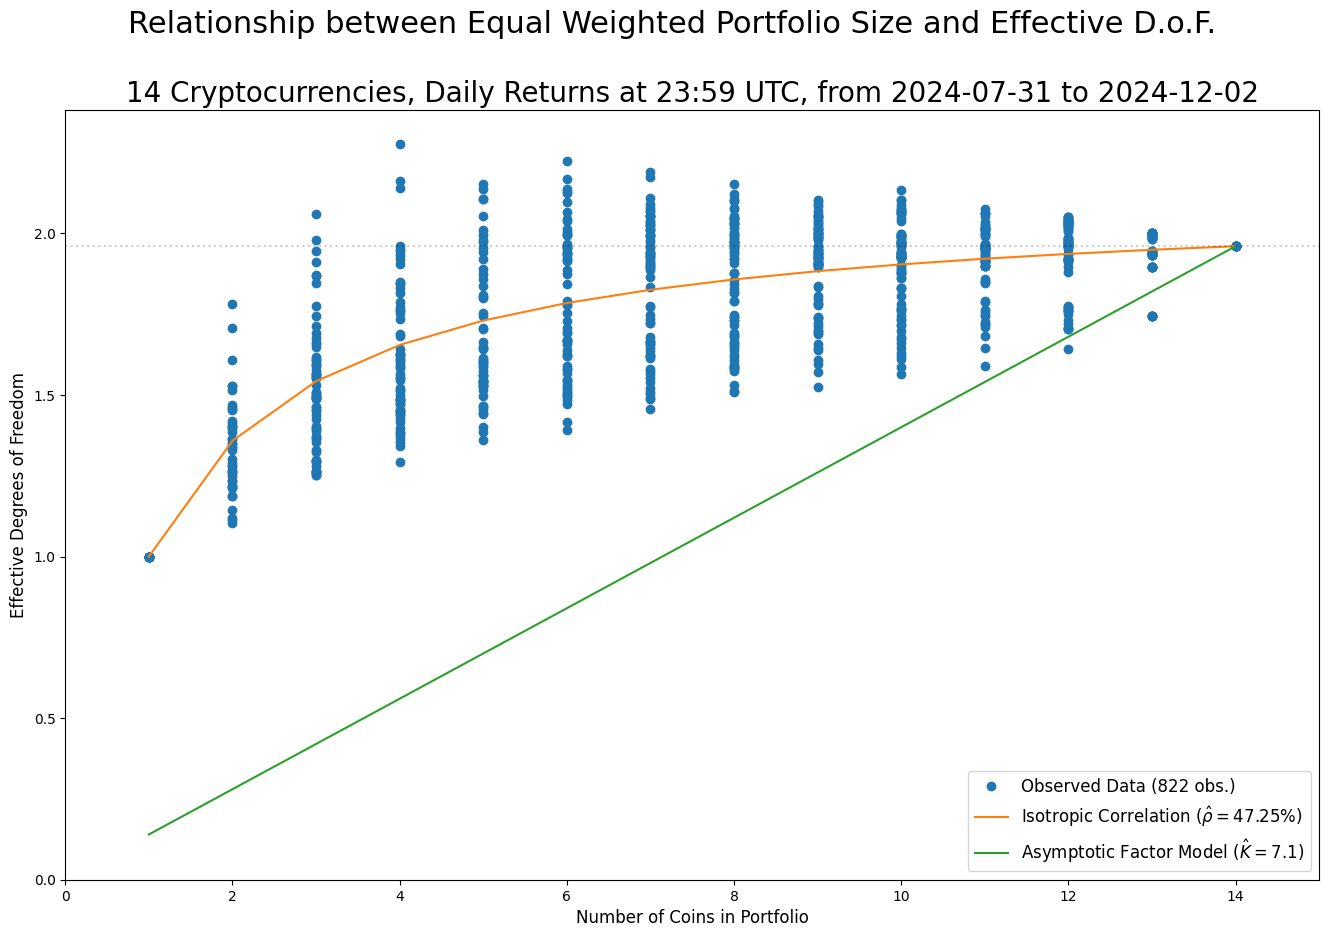

In [120]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.plot(x:=results["Assets"].to_numpy(),y:=results["Effective D.o.F."].to_numpy(),'o',label='Observed Data (%d obs.)' % results.shape[0])
plot.plot(xp:=np.unique(np.sort(x)),xp/(one+(xp-one)*rho),'-',label='Isotropic Correlation ($\\hat{\\rho} = %.2f$%%)' % (rho*hundred))
plot.plot(xp,xp/Khat,'-',label="Asymptotic Factor Model ($\\hat{K} = %.1f$)" % Khat)
#plot.plot(xpp:=np.arange(Nmin,Nmax+one),model.params.iloc[0]+model.params.iloc[1]*xpp,'-',label="Regression Linear Model ($\\hat{K} = %.1f$)" % Kreg)
plot.set_xscale('log' if max(x)>100 else 'linear')
plot.set_ylim(zero,None)
plot.set_xlabel("Number of Coins in Portfolio",fontsize=12)
plot.set_ylabel("Effective Degrees of Freedom",fontsize=12)
figure.suptitle(title:="Relationship between Equal Weighted Portfolio Size and Effective D.o.F.",fontsize=22)
plot.set_title(subtitle:="%d Cryptocurrencies, Daily Returns at 23:59 UTC, from %s to %s" % (data.shape[1],data.index[0],data.index[-1]),fontsize=20)
plot.set_xlim(zero,Nmax+two)
plot.legend(fontsize=12)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.xaxis.set_major_formatter(CountLabels())
figure.savefig(filepath+title+filetype,dpi=300,bbox_inches='tight')

17:34:30 Isotropic Model: Total Chi Squared 21.0438 for 12 d.o.f., p Value = 0.0497434.
17:34:30 Factor Model: Total Chi Squared 12.3004 for 7 d.o.f., p Value = 0.091103.


Mean   St.Dev. Sample  Std.Err. Isotropic                      \
                                                Model     Error   Z Score   
Assets                                                                      
1.0     1.000000  0.000000     75  0.000000  1.000000  0.000000       NaN   
2.0     1.306069  0.142568     71  0.016920  1.358259 -0.052190 -3.084573   
3.0     1.505662  0.208415     77  0.023751  1.542459 -0.036797 -1.549276   
4.0     1.642064  0.239380     64  0.029922  1.654657 -0.012593 -0.420861   
5.0     1.778049  0.221434     70  0.026466  1.730168  0.047881  1.809119   
6.0     1.777495  0.222344     71  0.026387  1.784458 -0.006963 -0.263866   
7.0     1.777008  0.194133     82  0.021438  1.825370 -0.048363 -2.255896   
8.0     1.853459  0.192954     50  0.027288  1.857307 -0.003848 -0.141002   
9.0     1.879540  0.159607     65  0.019797  1.882930 -0.003390 -0.171235   
10.0    1.902286  0.134694     82  0.014874  1.903943 -0.001657 -0.111413   
11.0    1.928378  0.098244     70  0.011742  1.921488  0.006890  0.586774   
12.0    1.937207  0.096158     71  0.011412  1.936357  0.000850  0.074502   
13.0    1.951177  0.056827     83  0.006238  1.949120  0.002057  0.329703   

                    Factor                                
         Chi Sq.     Model     Error   Z Score   Chi Sq.  
Assets                                                    
1.0          NaN       NaN       NaN       NaN       NaN  
2.0     9.514592       NaN       NaN       NaN       NaN  
3.0     2.400257       NaN       NaN       NaN       NaN  
4.0     0.177124       NaN       NaN       NaN       NaN  
5.0     3.272912  1.762182  0.015867  0.599523  0.359428  
6.0     0.069625  1.787721 -0.010226 -0.387521  0.150172  
7.0     5.089069  1.813260 -0.036253 -1.691012  2.859520  
8.0     0.019882  1.838799  0.014660  0.537248  0.288636  
9.0     0.029321  1.864338  0.015202  0.767901  0.589672  
10.0    0.012413  1.889877  0.012409  0.834232  0.695943  
11.0    0.344304  1.915416  0.012962  1.103831  1.218443  
12.0    0.005551  1.940955 -0.003748 -0.328423  0.107862  
13.0    0.108704  1.966494 -0.015318 -2.455752  6.030719

17:34:30 F Test for Equivalence of Descriptions: F(7,12) = 1.00203, p Value = 0.94996.


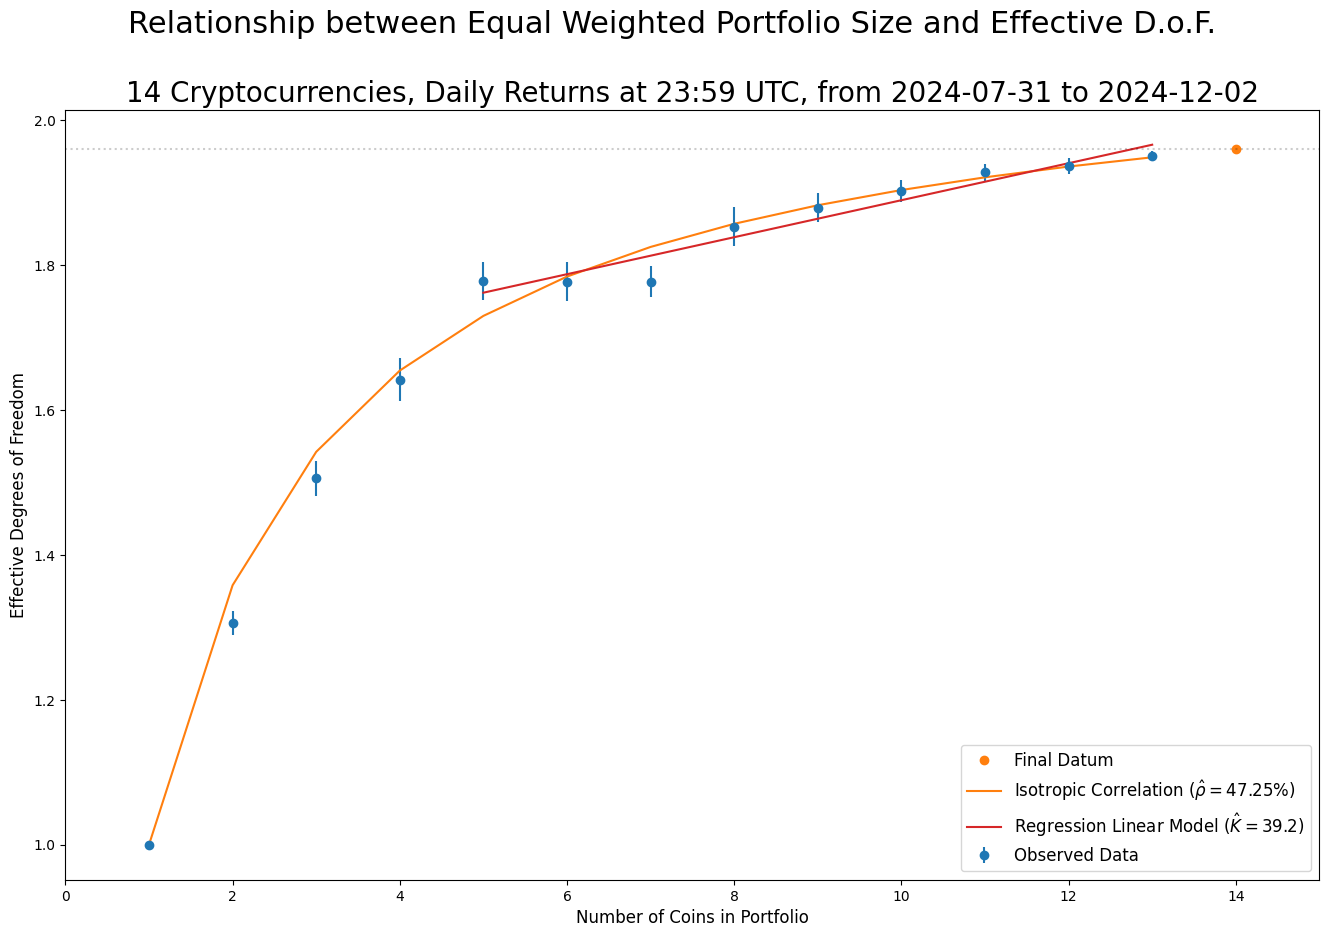

In [112]:
from scipy.stats import chi2,f as fdensity
meta=pd.DataFrame()
meta["Mean"]=(g:=results[(results["Assets"]<=Nmax)][["Assets","Effective D.o.F."]].groupby("Assets")).mean()
meta["St.Dev."]=g.std()
meta["Sample"]=g.count()
meta["Std.Err."]=meta["St.Dev."]/meta["Sample"]**0.5
meta[(l:="Isotropic","Model")]=(x:=meta.index)/(one+(x-one)*rho)
meta[(l,"Error")]=meta["Mean"]-meta[(l,"Model")]
meta[(l,"Z Score")]=meta[(l,"Error")]/meta["Std.Err."]
meta[(l,"Chi Sq.")]=meta[(l,"Z Score")]**2
nprint("%s Model: Total Chi Squared %g for %d d.o.f., p Value = %g." % (l,sc21:=meta[(l,"Chi Sq.")].sum(),df1:=meta[(l,'Chi Sq.')].count(),chi2(df1).sf(sc21)))
meta[(l:="Factor","Model")]=list(map(lambda x:model.params.iloc[0]+model.params.iloc[1]*x if x>=Nmin and x<=Nmax else np.nan,meta.index))
meta[(l,"Error")]=meta["Mean"]-meta[(l,"Model")]
meta[(l,"Z Score")]=meta[(l,"Error")]/meta["Std.Err."]
meta[(l,"Chi Sq.")]=meta[(l,"Z Score")]**2
nprint("%s Model: Total Chi Squared %g for %d d.o.f., p Value = %g." % (l,sc22:=meta[(l,"Chi Sq.")].sum(),df2:=meta[(l,'Chi Sq.')].count()-len(model.params),chi2(df2).sf(sc22)))
meta.columns=pd.MultiIndex.from_tuples(list(map(lambda x:x if type(x)==tuple else (x,''),meta.columns)))
display(meta)

nprint("F Test for Equivalence of Descriptions: F(%d,%d) = %g, p Value = %g." % (df2,df1,(f:=(sc22/df2)/(sc21/df1)),two*min([fdensity(df2,df1).sf(f),fdensity(df2,df1).cdf(f)])))

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.errorbar(x=meta.index,y=meta["Mean"],yerr=meta["Std.Err."],fmt='o',label='Observed Data')
plot.plot([Nact],[Nstar],'o',label='Final Datum',color='C1')
plot.plot(x,z:=meta[("Isotropic","Model")],'-',label='Isotropic Correlation ($\\hat{\\rho} = %.2f$%%)' % (rho*hundred),color='C1')
plot.plot(xp:=np.arange(Nmin,Nmax+one),model.params.iloc[0]+model.params.iloc[1]*xp,'-',label="Regression Linear Model ($\\hat{K} = %.1f$)" % Kreg,color='C3')
plot.set_xscale('log' if max(x)>100 else 'linear')
plot.set_xlabel("Number of Coins in Portfolio",fontsize=12)
plot.set_ylabel("Effective Degrees of Freedom",fontsize=12)
figure.suptitle(title,fontsize=22)
plot.set_title(subtitle,fontsize=20)
plot.set_xlim(zero,Nmax+two)
plot.legend(fontsize=12)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.xaxis.set_major_formatter(CountLabels())
figure.savefig(filepath+title+" 2"+filetype,dpi=300,bbox_inches='tight')

17:34:31 Isotropic Model: Total Chi Squared 21.0438 for 12 d.o.f., p Value = 0.0497434.
17:34:31 Fitted linear factor model curve via NLLS: b2bar = 1.71071e-18 ± 0.164866, bbar2 = 7.24387 ± 1.79804e+07, s2bar = 17.5795 ± 4.36348e+07.
17:34:31 Factor Model: Total Chi Squared 572.714 for 9 d.o.f., p Value = 1.49849e-117.


Sample                           Isotropic                      \
            Mean   St.Dev. Count  Std.Err.     Model     Error   Z Score   
Assets                                                                     
1.0     1.000000  0.000000    75  0.000000  1.000000  0.000000       NaN   
2.0     1.306069  0.142568    71  0.016920  1.358259 -0.052190 -3.084573   
3.0     1.505662  0.208415    77  0.023751  1.542459 -0.036797 -1.549276   
4.0     1.642064  0.239380    64  0.029922  1.654657 -0.012593 -0.420861   
5.0     1.778049  0.221434    70  0.026466  1.730168  0.047881  1.809119   
6.0     1.777495  0.222344    71  0.026387  1.784458 -0.006963 -0.263866   
7.0     1.777008  0.194133    82  0.021438  1.825370 -0.048363 -2.255896   
8.0     1.853459  0.192954    50  0.027288  1.857307 -0.003848 -0.141002   
9.0     1.879540  0.159607    65  0.019797  1.882930 -0.003390 -0.171235   
10.0    1.902286  0.134694    82  0.014874  1.903943 -0.001657 -0.111413   
11.0    1.928378  0.098244    70  0.011742  1.921488  0.006890  0.586774   
12.0    1.937207  0.096158    71  0.011412  1.936357  0.000850  0.074502   
13.0    1.951177  0.056827    83  0.006238  1.949120  0.002057  0.329703   

                    Factor                                   
         Chi Sq.     Model     Error    Z Score     Chi Sq.  
Assets                                                       
1.0          NaN  0.708183  0.291817        NaN         NaN  
2.0     9.514592  1.096414  0.209655  12.391209  153.542057  
3.0     2.400257  1.341566  0.164097   6.909033   47.734743  
4.0     0.177124  1.510427  0.131637   4.399276   19.353628  
5.0     3.272912  1.633815  0.144234   5.449719   29.699433  
6.0     0.069625  1.727918  0.049577   1.878824    3.529978  
7.0     5.089069  1.802056 -0.025049  -1.168406    1.365172  
8.0     0.019882  1.861974 -0.008514  -0.312020    0.097356  
9.0     0.029321  1.911404 -0.031864  -1.609549    2.590649  
10.0    0.012413  1.952879 -0.050593  -3.401335   11.569077  
11.0    0.344304  1.988176 -0.059798  -5.092472   25.933266  
12.0    0.005551  2.018580 -0.081372  -7.130500   50.844023  
13.0    0.108704  2.045042 -0.093865 -15.048399  226.454323

17:34:31 Wrote meta data to '/content/drive/MyDrive/meta.tex.'
17:34:31 F Test for Equivalence of Descriptions: F(9,12) = 36.2872, p Value = 4.81528e-07.


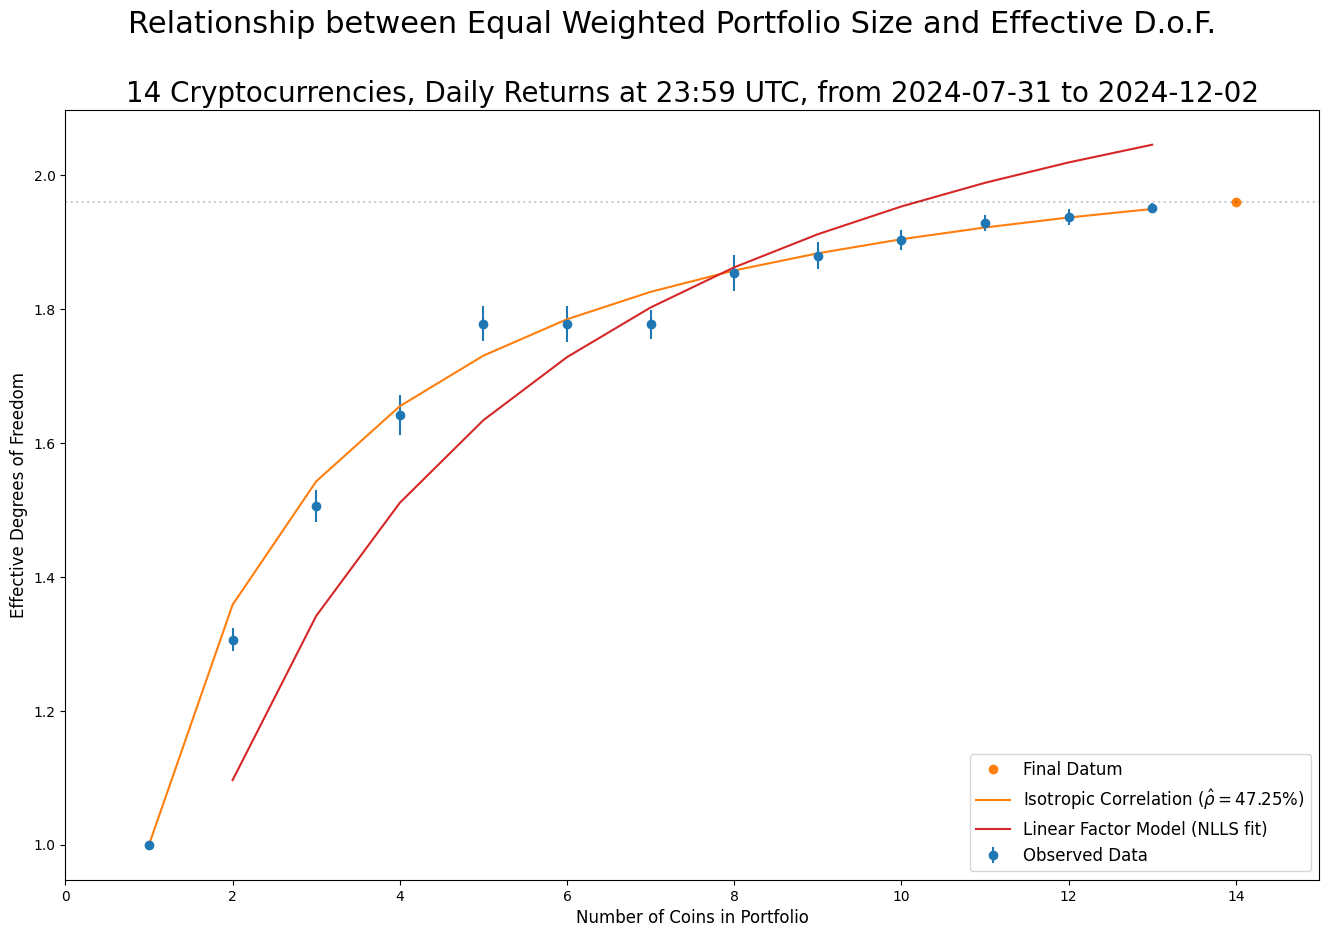

In [113]:
from scipy.stats import chi2,f as fdensity
from scipy.optimize import curve_fit

def nstar(N,*args):
    """Factor model N*(N) function. Parameters are: b2bar, bbar2, s2bar in that order."""
    b2bar,bbar2,s2bar=args
    return N*(b2bar*N+s2bar)/(bbar2*N+s2bar)

meta=pd.DataFrame()
meta[(s:="Sample","Mean")]=(g:=results[(results["Assets"]<=Nmax)][["Assets","Effective D.o.F."]].groupby("Assets")).mean()
meta[(s,"St.Dev.")]=g.std()
meta[(s,"Count")]=g.count()
meta[(s,"Std.Err.")]=meta[(s,"St.Dev.")]/meta[(s,"Count")]**0.5
meta[(l:="Isotropic","Model")]=(x:=meta.index)/(one+(x-one)*rho)
meta[(l,"Error")]=meta[(s,"Mean")]-meta[(l,"Model")]
meta[(l,"Z Score")]=meta[(l,"Error")]/meta[(s,"Std.Err.")]
meta[(l,"Chi Sq.")]=meta[(l,"Z Score")]**2
meta.columns=pd.MultiIndex.from_tuples(list(map(lambda x:x if type(x)==tuple else (x,''),meta.columns)))
nprint("%s Model: Total Chi Squared %g for %d d.o.f., p Value = %g." % (l,sc21:=meta[(l,"Chi Sq.")].sum(),df1:=meta[(l,'Chi Sq.')].count(),chi2(df1).sf(sc21)))

theta,vee=curve_fit(nstar,xf:=meta.index[1:],meta.loc[xf,(s,"Mean")],p0=(one,one,one/hundred),bounds=(zero,np.inf))
sigmas=np.sqrt(np.diag(vee))
nprint("Fitted linear factor model curve via NLLS: b2bar = %g ± %g, bbar2 = %g ± %g, s2bar = %g ± %g." % (theta[0],sigmas[0],theta[1],sigmas[1],theta[2],sigmas[2]))
meta[(l:="Factor","Model")]=list(map(lambda q:nstar(q,*theta),meta.index))
meta[(l,"Error")]=meta[(s,"Mean")]-meta[(l,"Model")]
meta[(l,"Z Score")]=(meta[(l,"Error")]/meta[(s,"Std.Err.")]).replace(np.inf,np.nan)
meta[(l,"Chi Sq.")]=meta[(l,"Z Score")]**2
nprint("%s Model: Total Chi Squared %g for %d d.o.f., p Value = %g." % (l,sc22:=meta[(l,"Chi Sq.")].sum(),df2:=meta[(l,'Chi Sq.')].count()-len(theta),chi2(df2).sf(sc22)))

display(meta)
meta.replace(np.nan,"").style.format(precision=3).to_latex(latexfile:=filepath+'meta.tex')
nprint("Wrote meta data to '%s.'" % latexfile)

nprint("F Test for Equivalence of Descriptions: F(%d,%d) = %g, p Value = %g." % (df2,df1,(f:=(sc22/df2)/(sc21/df1)),two*min([fdensity(df2,df1).sf(f),fdensity(df2,df1).cdf(f)])))

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.errorbar(x=meta.index,y=meta[(s,"Mean")],yerr=meta[(s,"Std.Err.")],fmt='o',label='Observed Data')
plot.plot([Nact],[Nstar],'o',label='Final Datum',color='C1')
plot.plot(x,z:=meta[("Isotropic","Model")],'-',label='Isotropic Correlation ($\\hat{\\rho} = %.2f$%%)' % (rho*hundred),color='C1')
plot.plot(xf,zf:=list(map(lambda q:nstar(q,*theta),xf)),'-',label="Linear Factor Model (NLLS fit)",color='C3')
plot.set_xscale('log' if max(x)>100 else 'linear')
plot.set_xlabel("Number of Coins in Portfolio",fontsize=12)
plot.set_ylabel("Effective Degrees of Freedom",fontsize=12)
figure.suptitle(title,fontsize=22)
plot.set_title(subtitle,fontsize=20)
plot.set_xlim(zero,Nmax+two)
plot.legend(fontsize=12)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.xaxis.set_major_formatter(CountLabels())
figure.savefig(filepath+title+" 3"+filetype,dpi=300,bbox_inches='tight')

In [114]:
from datetime import timedelta
history,returns=download(list(data)).xs('Adj Close',axis=1,level=0),pd.DataFrame()

for c in history:
    if history[c].last_valid_index()!=history.last_valid_index(): # get rid of tickers that have gone stale (this is COIN as returned by Yahoo)
        history.drop(columns=c,inplace=True)

    else:
        returns[c]=history[c].pct_change(fill_method=None)*hundred
        returns.loc[(f:=returns[c].first_valid_index()):(f+timedelta(days=365)),c]=np.nan # set first year of data to NA to avoid launch spikes

returns.index=pd.DatetimeIndex(returns.index).to_period('D')
returns.dropna(inplace=True,how='all')
returns.drop(returns.index[-1],inplace=True) # remove the final row in case it is not complete
returns=returns[[c for c in returns if c not in (vetoes:=['SHIB-USD','UNI-USD'])]].copy() # dropping SHIB (very low values, precision issue) and UNI (step change in 2022 by orders of magnitude)
nprint("Removed %s entirely!" % ", ".join(vetoes))
returns=returns.copy()
returns['Count']=returns.count(axis=1)
returns=returns[returns['Count']>=five]
returns["Portfolio"]=returns.mean(axis=1)
returns["Year"]=returns.index.year
display(returns)

[*********************100%***********************]  14 of 14 completed


17:34:33 Removed SHIB-USD, UNI-USD entirely!


<ipython-input-114-f1a811ea9f81>:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  returns.index=pd.DatetimeIndex(returns.index).to_period('D')


,AAVE-USD,AVAX-USD,BCH-USD,BTC-USD,DOGE-USD,ETC-USD,ETH-USD,LINK-USD,LTC-USD,XLM-USD,XTZ-USD,Count,Portfolio,Year
Date,,,,,,,,,,,,,,
2018-11-11,NaN,NaN,-4.161377,0.031982,-3.744292,-2.096713,-0.561329,-2.208038,-1.978748,4.737204,0.642718,9,-0.033859,2018
2018-11-12,NaN,NaN,-3.193828,-0.623901,-3.099306,-0.742514,-0.436262,10.431562,-1.395306,-2.294911,-3.804309,9,0.384122,2018
2018-11-13,NaN,NaN,-0.754790,-0.184889,-3.883811,-1.225531,-1.707076,3.312554,-1.878841,-3.568305,-1.776871,9,-0.266756,2018
2018-11-14,NaN,NaN,-14.266303,-9.767137,-8.488966,-12.485053,-12.294876,-5.778568,-12.245908,-9.598618,-10.177453,9,-8.610288,2018
2018-11-15,NaN,NaN,-4.094623,-1.573977,3.896099,-2.833865,-0.325807,-1.133531,0.773886,3.819467,-0.530559,9,0.699709,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-28,-4.816990,-2.441733,-1.495784,-0.323108,0.122787,-3.151934,-2.117377,-3.932268,-1.661260,3.083492,0.725616,11,-0.417380,2024
2024-11-29,-0.593636,4.864422,1.250964,1.891279,5.925355,0.031127,0.382223,1.835631,8.755312,10.002958,6.859580,11,4.350435,2024
2024-11-30,6.452426,-0.069545,1.338308,-1.038839,-0.908328,2.449432,3.122613,4.002142,-1.314798,-4.204079,22.908772,11,3.644842,2024


In [115]:
results=pd.DataFrame({"Sample":range(1,(n:=5000)+1),"Assets":[np.nan]*n,"Portfolio":[np.nan]*n,"Coins":[""]*n,"Period":[np.nan]*n}).set_index("Sample") # n is number of trials
nprint("Beginning analysis for {:,d} trials.".format(n))

for i in tqdm(results.index): # for each trial, pick a random sample of stocks with portfolio sizes uniformly distributed between 1 and maximum, one of 2^Nmax-1 choices
    period=generator.choice(returns[p:="Year"].unique(),1)[0]
    subset=returns[returns[p]==period][generator.choice(a:=[c for c in returns.columns if '-' in c],generator.integers(1,len(a)+1),replace=False)].copy()
    subset.dropna(inplace=True)
    results.loc[i,"Coins"]=",".join(sorted(map(lambda x:x.split('-')[0],subset.columns))) # list of coins in portfolio
    subset['Portfolio']=subset.mean(axis=1) # equal weighted portfolio return
    results.loc[i,"Assets"]=subset.shape[1]-1 # number of assets we ended up with
    results.loc[i,"Independent"]=subset[[c for c in subset if '-' in c]].var().sum()/results.loc[i,"Assets"]**2 # if no correlation, portfolio variance is total variance divided by square of number of assets
    results.loc[i,"Portfolio"]=subset['Portfolio'].var() # variance of portfolio returns for same period as individual returns
    results.loc[i,"Period"]=period

results.dropna(inplace=True)
results.drop_duplicates(inplace=True)
results["Effective D.o.F."]=results["Independent"]/results["Portfolio"]*results["Assets"]
display(results)
nprint("Done.")

17:34:33 Beginning analysis for 5,000 trials.


  0%|          | 0/5000 [00:00<?, ?it/s]

,Assets,Portfolio,Coins,Period,Independent,Effective D.o.F.
Sample,,,,,,
1,9.0,6.916240,"AAVE,BCH,BTC,DOGE,ETC,ETH,LTC,XLM,XTZ",2023.0,1.321290,1.719375
3,6.0,20.177927,"AVAX,ETC,LINK,LTC,XLM,XTZ",2022.0,4.315702,1.283294
4,6.0,17.827986,"BCH,BTC,ETC,ETH,LINK,XTZ",2022.0,3.806425,1.281050
6,5.0,15.713091,"BCH,BTC,DOGE,LTC,XTZ",2022.0,4.208331,1.339116
7,9.0,18.199031,"AAVE,AVAX,BCH,BTC,ETH,LINK,LTC,XLM,XTZ",2022.0,2.584770,1.278251
...,...,...,...,...,...,...
4994,5.0,10.762320,"AAVE,BTC,ETH,LINK,XLM",2024.0,3.775910,1.754227
4995,10.0,12.010190,"AVAX,BCH,BTC,DOGE,ETC,ETH,LINK,LTC,XLM,XTZ",2024.0,2.087056,1.737737
4998,3.0,63.716435,"BCH,LINK,XLM",2018.0,27.726772,1.305477


17:35:04 Done.


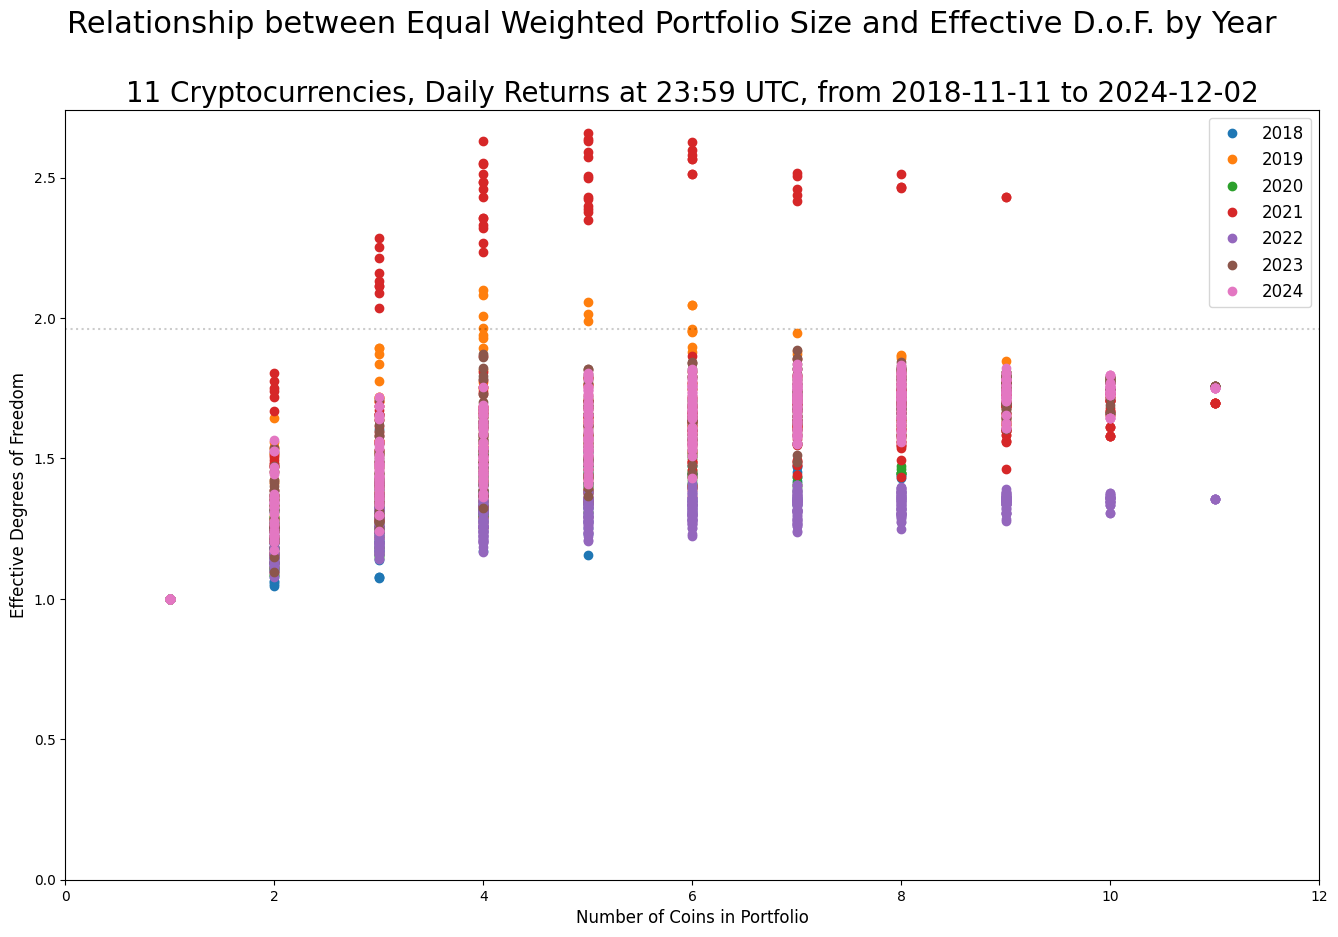

In [116]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
Nmax=results["Assets"].max()-one

for period in sorted(results["Period"].unique()):
    plot.plot(x:=results[select:=results["Period"]==period]["Assets"].to_numpy(),y:=results[select]["Effective D.o.F."].to_numpy(),'o',label=int(period))

plot.set_xscale('log' if max(x)>100 else 'linear')
plot.set_ylim(zero,None)
plot.set_xlabel("Number of Coins in Portfolio",fontsize=12)
plot.set_ylabel("Effective Degrees of Freedom",fontsize=12)
figure.suptitle(title:="Relationship between Equal Weighted Portfolio Size and Effective D.o.F. by Year",fontsize=22)
plot.set_title(subtitle:="%d Cryptocurrencies, Daily Returns at 23:59 UTC, from %s to %s" % (len(a),returns.index[0],returns.index[-1]),fontsize=20)
plot.set_xlim(zero,Nmax+two)
plot.legend(fontsize=12)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.xaxis.set_major_formatter(CountLabels())
figure.savefig(filepath+title+filetype,dpi=300,bbox_inches='tight')

,AAVE-USD,AVAX-USD,BCH-USD,BTC-USD,DOGE-USD,ETC-USD,ETH-USD,LINK-USD,LTC-USD,XLM-USD,XTZ-USD,Portfolio,Assets,Independent,Effective D.o.F.,Imputed Correlation
Year,,,,,,,,,,,,,,,,
2018,NaN,NaN,138.100860,25.599532,22.740650,50.768403,48.368609,69.624589,39.790087,41.815496,50.243165,30.908678,10,4.870514,1.575776,59.400905
2019,NaN,NaN,28.684996,12.690500,11.798156,19.125543,16.915673,48.141735,23.726669,18.438624,33.475413,10.387239,10,2.129973,2.050567,43.074443
2020,NaN,NaN,29.951167,14.219099,28.864247,27.412591,24.391541,44.235523,26.028220,37.074306,35.577777,16.649036,10,2.677545,1.608228,57.978037
2021,26.338886,64.152351,48.766624,17.715785,486.126192,65.957318,31.357507,53.562107,37.260494,54.787837,60.438949,31.808283,12,6.572667,2.479606,34.904354
2022,40.176555,32.575116,19.110765,11.061469,31.665288,36.796413,20.448674,26.495531,20.252314,16.127458,23.118447,15.636538,12,1.929361,1.480656,64.586499
2023,14.929209,19.360389,17.632938,5.247752,10.643087,11.242495,5.976481,14.988606,11.610572,18.608535,11.133410,6.137769,12,0.981760,1.919447,47.743635
2024,24.264205,23.593957,28.417991,8.044853,29.568764,17.384296,11.652832,20.374376,14.477005,30.061490,25.130013,10.154963,12,1.617846,1.911789,47.971299


17:35:05 Wrote variances to '/content/drive/MyDrive/variances.tex.'


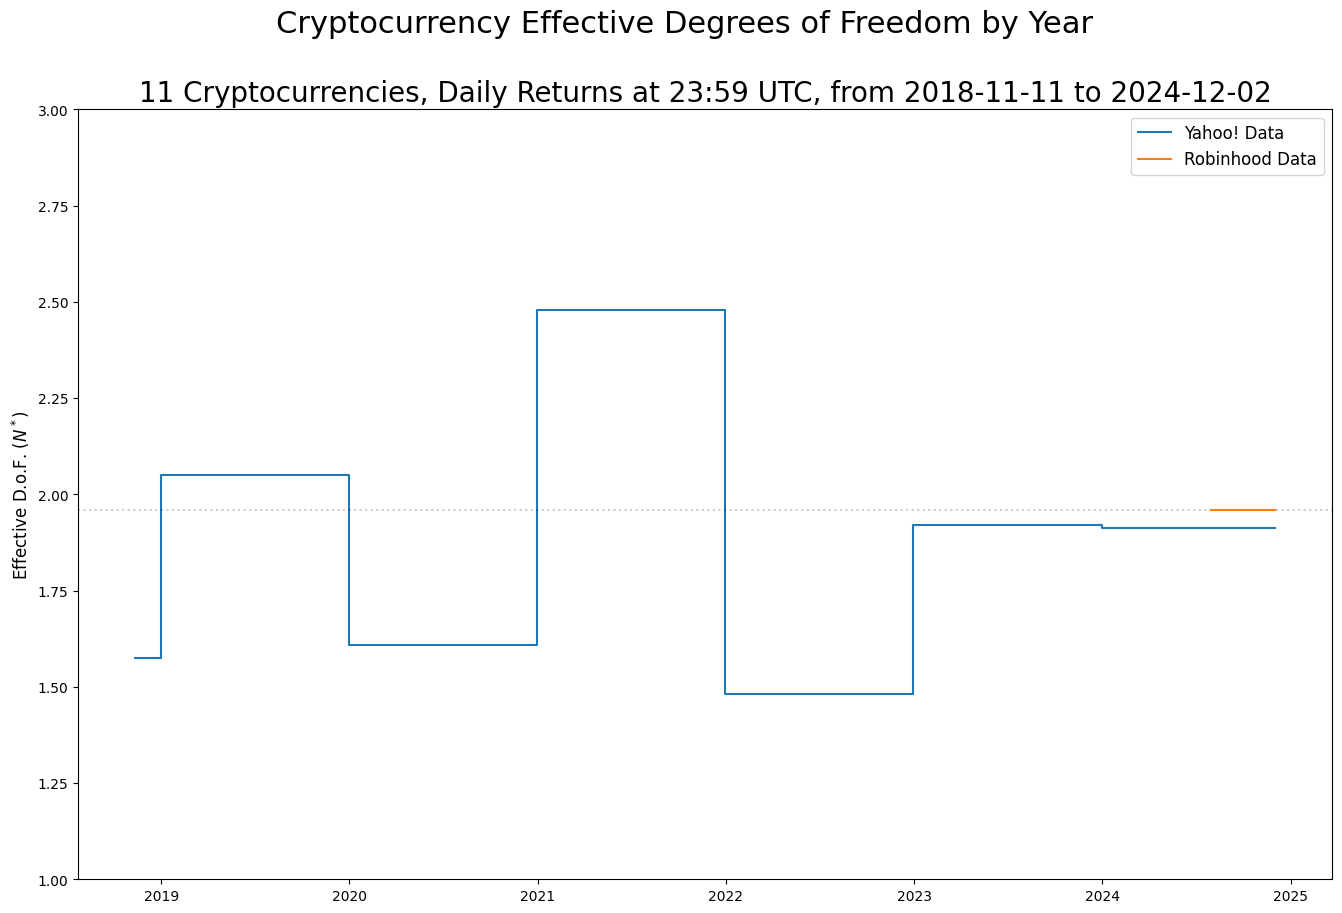

In [117]:
variances=returns[[c for c in returns if '-' in c or c in ('Portfolio','Year')]].groupby('Year').var()
variances["Assets"]=variances.count(axis=1)
variances["Independent"]=variances[[c for c in variances if '-' in c]].sum(axis=1)/variances["Assets"]**2
variances[ns:="Effective D.o.F."]=variances["Independent"]/variances["Portfolio"]*variances[na:="Assets"]
variances[nr:="Imputed Correlation"]=(variances[na]-variances[ns])/((variances[na]-one)*variances[ns])*hundred
display(variances)
variances.replace(np.nan,"").T.style.format(precision=2).to_latex(latexfile:=filepath+'variances.tex')
nprint("Wrote variances to '%s.'" % latexfile)

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.step(x:=list(map(lambda x:pd.to_datetime(str(x)),[returns.index[0]]+list(map(lambda x:pd.Period(datetime(x,12,31),'D') if x<data.index[-1].year else data.index[-1],variances.index)))),
          y:=np.insert(variances[ns].to_numpy(),0,variances[ns].iloc[0]),'-',where='pre',label='Yahoo! Data') # the code to make x here is heinous, and that is due to Pandas
plot.set_ylabel("Effective D.o.F. ($N^*$)",fontsize=12)
plot.set_ylim(one,three)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.plot(x:=data.index[[0,-1]],y:=[Nstar]*len(x),'-',color='C1',label='Robinhood Data')
plot.legend(fontsize=12)
figure.suptitle(title:="Cryptocurrency Effective Degrees of Freedom by Year",fontsize=22)
plot.set_title(subtitle,fontsize=20)
figure.savefig(filepath+title+filetype,dpi=300,bbox_inches='tight')